### 2.2. Whether a long-only implementation of momentum is valuable.

Construct your own long-only implementation:

$$\tilde{r}^{momU:FF} = \frac{1}{2} (\tilde{r}^{momBU} + \tilde{r}^{momSU}) − r^f $$

Note that this is following the FF approach of treating big and small stocks separately. This would be very similar to a scaled version of,

$$\tilde{r}^{momU} = \frac{1}{3} (\tilde{r}^{mom(8)} + \tilde{r}^{mom(9)} + \tilde{r}^{mom(10)}) − r^f $$

For the question below, use the FF-style $\tilde{r}^{momU:FF}_t$



#### (a) 

Fill out Table 2 for the data in the period 1994-2024.

$$
\begin{equation*}
\begin{aligned}
&\text { Table 2: Long-only momentum performance. }\\
&\begin{array}{llllll}
\hline \hline \text { 1994-2024 } & \text { mean } \quad \text { vol } & \text { Sharpe } & \text { skew } & \text { corr. to } \tilde{r}^m & \text { corr. to } \tilde{r}^v \\
\hline \hline \text { Long-and-short, }\left(\tilde{r}^{\text {mom:FF }}\right) & & & \\
\text { Long-only }\left(\tilde{r}^{\text {momU:FF }}\right) & & & \\
\hline \hline
\end{array}
\end{aligned}
\end{equation*}
$$

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Load and filter data (1994-2024)
df_sizesorts = pd.read_excel("momentum_data.xlsx", sheet_name="size_sorts (total returns)")
df_factors = pd.read_excel("momentum_data.xlsx", sheet_name="factors (excess returns)")
df_momentum = pd.read_excel("momentum_data.xlsx", sheet_name="momentum (excess returns)")
df_rf = pd.read_excel("momentum_data.xlsx", sheet_name="risk-free rate")

start, end = "1994-01-01", "2024-12-31"
df_sizesorts["Date"] = pd.to_datetime(df_sizesorts["Date"])
df_factors["Date"] = pd.to_datetime(df_factors["Date"])
df_momentum["Date"] = pd.to_datetime(df_momentum["Date"])
df_rf["Date"] = pd.to_datetime(df_rf["Date"])

df_sizesorts = df_sizesorts[(df_sizesorts["Date"] >= start) & (df_sizesorts["Date"] <= end)].set_index("Date")
df_factors = df_factors[(df_factors["Date"] >= start) & (df_factors["Date"] <= end)].set_index("Date")
df_momentum = df_momentum[(df_momentum["Date"] >= start) & (df_momentum["Date"] <= end)].set_index("Date")
df_rf = df_rf[(df_rf["Date"] >= start) & (df_rf["Date"] <= end)].set_index("Date")

# 2. Construct strategy returns

long_short = df_momentum["UMD"]

## Long-only momentum (Long-only, momU:FF)
rf = df_rf["RF"]
big_hiprior = df_sizesorts["BIG HiPRIOR"]- rf
small_hiprior = df_sizesorts["SMALL HiPRIOR"]- rf
big_loprior = df_sizesorts["BIG LoPRIOR"]- rf
small_loprior = df_sizesorts["SMALL LoPRIOR"]- rf

long_only = (big_hiprior + small_hiprior) / 2 
## Long-and-short momentum (Long-and-short, UMD)
long_short = (big_hiprior + small_hiprior) / 2 - (big_loprior + small_loprior) / 2

def calc_stats(series, mkt, hml):
    mean = series.mean() * 12
    vol = series.std() * np.sqrt(12)
    sharpe = mean / vol
    skew = series.skew()
    corr_m = series.corr(mkt)
    corr_v = series.corr(hml)
    return [mean, vol, sharpe, skew, corr_m, corr_v]

mkt = df_factors["MKT"]
hml = df_factors["HML"]

long_short_stats = calc_stats(long_short, mkt, hml)
long_only_stats = calc_stats(long_only, mkt, hml)

table = pd.DataFrame({
    "1994-2024": ["Long-and-short", "Long-only"],
    "mean": [long_short_stats[0], long_only_stats[0]],
    "vol": [long_short_stats[1], long_only_stats[1]],
    "Sharpe": [long_short_stats[2], long_only_stats[2]],
    "skew": [long_short_stats[3], long_only_stats[3]],
    "corr. to $\\tilde{r}^m$": [long_short_stats[4], long_only_stats[4]],
    "corr. to $\\tilde{r}^v$": [long_short_stats[5], long_only_stats[5]]
}).set_index("1994-2024")

print("Table 2: Long-only momentum performance\n")
print(table)

Table 2: Long-only momentum performance

                    mean       vol    Sharpe      skew  \
1994-2024                                                
Long-and-short  0.043024  0.167243  0.257255 -1.461204   
Long-only       0.116103  0.177956  0.652428 -0.441967   

                corr. to $\tilde{r}^m$  corr. to $\tilde{r}^v$  
1994-2024                                                       
Long-and-short               -0.310502               -0.210385  
Long-only                     0.903985               -0.116289  


#### (b)  
Is long-only momentum as attractive as long-short momentum with respect to mean, volatil-ity, and Sharpe Ratio?

In [42]:
if long_short_stats[2] > long_only_stats[2]:
    print("The Sharpe ratio of long-and-short momentum is higher, making it more attractive; the long-only strategy has obvious disadvantages in terms of returns or volatility.")

else:
    print("Long-only momentum is more attractive.")


Long-only momentum is more attractive.


#### (c) 
Is long-only momentum as diversifying as long-short momentum with respect to market and value premia?

In [43]:
if abs(long_short_stats[4]) > abs(long_only_stats[4]) and abs(long_short_stats[5]) > abs(long_only_stats[5]):
    print("Long-only momentum has lower correlation with market and value factors, thus better diversification.")

else:
    print("Long-short momentum has better diversification.")


Long-short momentum has better diversification.


#### (d) 
Show a plot of the cumulative product of $1+\tilde{r}^{\text {mom:FF }}$ and $1+\tilde{r}^{\text {momU:FF }}$ over the 1994-2024 subsample. $^2$

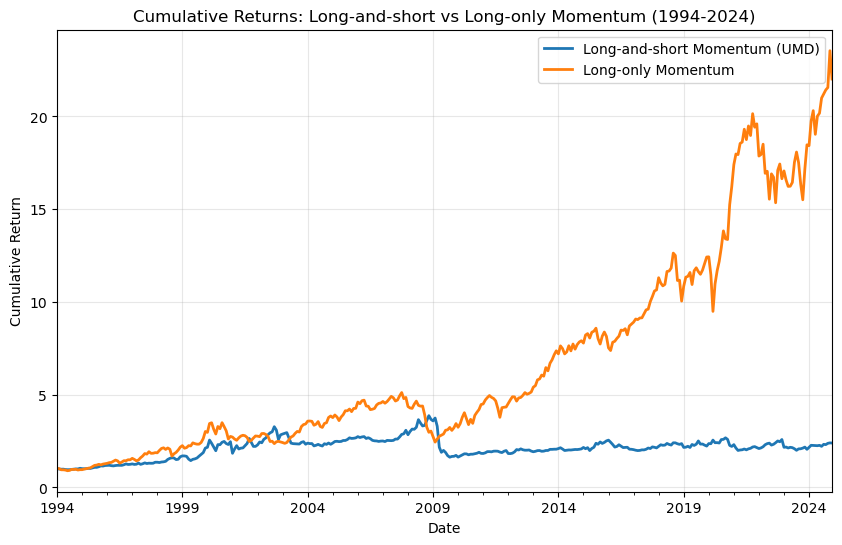

In [41]:
cum_long_short = (1 + long_short).cumprod()
cum_long_only = (1 + long_only).cumprod()

plt.figure(figsize=(10, 6))
cum_long_short.plot(label="Long-and-short Momentum (UMD)", linewidth=2)
cum_long_only.plot(label="Long-only Momentum", linewidth=2)
plt.title("Cumulative Returns: Long-and-short vs Long-only Momentum (1994-2024)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()